
---

# **🔤  03 b - Model Testing: Modern Embedding Approaches**

## **📑 Table of Contents**
1.  [🎯 Objectives](#-objectives)
2.  [⚙️ Setup & Imports](#-setup--imports)
3.  [📥 Load Cleaned Data](#-load-cleaned-data)
4.  [🔤 Sentence Transformer Embeddings](#-sentence-transformer-embeddings)
5.  [🤖 Model Training](#-model-training)
6.  [📊 Comprehensive Model Evaluation](#-comprehensive-model-evaluation)
7.  [📈 Advanced Visualizations](#-advanced-visualizations)
8.  [🏆 Best Model Selection](#-best-model-selection)
9.  [💾 Save Results](#-save-results)

---

## **🎯 Objectives**
- Test modern sentence embedding techniques
- Compare multiple classification models
- Perform comprehensive evaluation with multiple metrics
- Select and save the best performing model


---

## **⚙️ 1. Setup & Imports**


In [1]:
# Add project root to path
import sys
import os
sys.path.append(os.path.abspath('..'))

# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings("ignore")

# Model training
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Enhanced evaluation metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                            roc_auc_score, roc_curve, confusion_matrix, classification_report,
                            precision_recall_curve, auc)
from sklearn.calibration import calibration_curve


# Sentence Transformers (modern embedding approach)
from sentence_transformers import SentenceTransformer

# Model persistence
import joblib

print("✅ All libraries imported successfully!")

### **🔧 Import Enhanced Functions from modeling_utils.py**

from src.modeling_utils import (
    engineer_time_features, combine_text_features, 
    evaluate_model_comprehensive, plot_experiment_results, plot_model_comparison, plot_feature_analysis
)

# Unified experiment tracker
from src.experiment_tracker import log_experiment, create_experiment_id
from src.experiment_tracker import load_experiment_results


%matplotlib inline
plt.style.use('default')

✅ All libraries imported successfully!


---

## **📥 2. Load Cleaned Data & Experimental Setup**


In [2]:
print("📁 Loading cleaned datasets...")

# Load different cleaning strategies
# df_basic = pd.read_csv('../dataset/01_interim/cleaned_data_basic.csv')
# df_aggressive = pd.read_csv('../dataset/01_interim/cleaned_data_aggressive.csv')

# val_basic = pd.read_csv('../dataset/01_interim/cleaned_validation_basic.csv')
# val_aggressive = pd.read_csv('../dataset/01_interim/cleaned_validation_aggressive.csv')


data_gentle_nodups = pd.read_csv('../dataset/01_interim/cleaned_data_gentle_nodups.csv')

print(f"✅ Datasets loaded:")
# print(f"   - Basic cleaning: {df_basic.shape}")
# print(f"   - Aggressive cleaning: {df_aggressive.shape}")
print(f"   - Gente cleaning no dups: {data_gentle_nodups.shape}")

# Check available columns
# print(f"\n�� Available columns: {df_basic.columns.tolist()}")
print(f"\n�� Available columns: {data_gentle_nodups.columns.tolist()}")


📁 Loading cleaned datasets...
✅ Datasets loaded:
   - Gente cleaning no dups: (35631, 32)

�� Available columns: ['label', 'title', 'text', 'subject', 'year', 'quarter', 'is_weekend', 'clean_title', 'clean_text', 'title_length', 'title_word_count', 'text_length', 'text_word_count', 'title_capitals', 'text_capitals', 'title_capitals_ratio', 'text_capitals_ratio', 'title_exclamation', 'text_exclamation', 'title_question', 'text_question', 'title_quotes', 'text_quotes', 'title_dollar', 'text_dollar', 'title_numbers', 'text_numbers', 'title_all_caps_words', 'text_all_caps_words', 'title_sensational_count', 'text_sensational_count', 'sensational_score']



---

## **🧪 3. Experiment Design Framework**


### **🔬 Experiment Matrix**

We'll systematically test combinations of:
1. **Feature Types**: title only, text only, title+text combined, time features
2. **Cleaning Strategies**: basic (preserves context) vs aggressive (removes noise)  
3. **Models**: Logistic Regression, Random Forest, SVM
4. **Embeddings**: Sentence Transformers (all-MiniLM-L6-v2)

#### 1. **Experiment Matrix v1 - many Experimental Configurations**

1. Batch of experiments:

(CURSOR V. - No Subject, Added Time Features)


In [ ]:
## 1st Batch of experiments:

# # Define experimental configurations
# experimental_configs = [
#     # Feature combinations with BASIC cleaning
#     {'name': 'Title_Basic', 'data': df_basic, 'features': ['clean_title'], 'cleaning': 'basic'},
#     {'name': 'Text_Basic', 'data': df_basic, 'features': ['clean_text'], 'cleaning': 'basic'},
#     {'name': 'Title+Text_Basic', 'data': df_basic, 'features': ['clean_title', 'clean_text'], 'cleaning': 'basic'},
#     {'name': 'Title+Time_Basic', 'data': df_basic, 'features': ['clean_title', 'is_recent', 'is_medium_age', 'is_old'], 'cleaning': 'basic'},
#     {'name': 'Title+Text+Time_Basic', 'data': df_basic, 'features': ['clean_title', 'clean_text', 'is_recent', 'is_medium_age', 'is_old'], 'cleaning': 'basic'},
    
#     # Feature combinations with AGGRESSIVE cleaning
#     {'name': 'Title_Aggressive', 'data': df_aggressive, 'features': ['clean_title'], 'cleaning': 'aggressive'},
#     {'name': 'Text_Aggressive', 'data': df_aggressive, 'features': ['clean_text'], 'cleaning': 'aggressive'},
#     {'name': 'Title+Text_Aggressive', 'data': df_aggressive, 'features': ['clean_title', 'clean_text'], 'cleaning': 'aggressive'},
#     {'name': 'Title+Time_Aggressive', 'data': df_aggressive, 'features': ['clean_title', 'is_recent', 'is_medium_age', 'is_old'], 'cleaning': 'aggressive'},
#     {'name': 'Title+Text+Time_Aggressive', 'data': df_aggressive, 'features': ['clean_title', 'clean_text', 'is_recent', 'is_medium_age', 'is_old'], 'cleaning': 'aggressive'},
# ]



#### 2. **Experiment Matrix v2.1 - Focused Subset**
2. Batch, less amount of experiments


In [ ]:
# # We'll test only these specific configurations:
# focused_configs = [
#     # Text with Aggressive cleaning
#     {'name': 'Text_Aggressive', 'data': df_aggressive, 'features': ['clean_text'], 'cleaning': 'aggressive'},
#     # Text with Basic cleaning  
#     {'name': 'Text_Basic', 'data': df_basic, 'features': ['clean_text'], 'cleaning': 'basic'},
#     # Title+Text+Time with Basic cleaning
#     {'name': 'Title+Text+Time_Basic', 'data': df_basic, 'features': ['clean_title', 'clean_text', 'is_recent', 'is_medium_age', 'is_old'], 'cleaning': 'basic'},
# ]

#### 3. **Experiment Matrix v3.1 - Focused Subset**
1. 3rd Batch, less amount of experiments
2. wining settings with 2 other models


In [ ]:
# ### **Experiment Matrix - Focused on Winning Combination**
# # Only test the winning configuration with additional models
# focused_configs = [
#     {'name': 'Text_Aggressive', 'data': df_aggressive, 'features': ['clean_text'], 'cleaning': 'aggressive'}
# ]

#### 4. **Experiment Matrix v4.1 - Focused Subset**

**Objective:** 4th Batch with optimized, focused experiments testing the winning configuration with new feature combinations on SVC model only.

**Strategy:**
- Build upon previous winning configuration: `Text_Aggressive` 
- Test systematic addition of new engineered features
- Use only SVC model (best performer from previous batches)
- Minimal, targeted experiments for maximum insight

**Hypothesis:** The new engineered features (text lengths + time features) will improve upon the baseline text-only performance.

In [ ]:
# ### **🧪 Experiment Matrix v3.1 - Focused Feature Testing**
# print("🧪 Configuring Experiment Matrix v3.1 - Focused Feature Testing")

# # Winning base configuration
# base_config = {
#     'name': 'Text_Aggressive', 
#     'data': df_aggressive,
#     'features': ['clean_text'],  # Winning feature
#     'cleaning': 'aggressive'     # Winning preprocessing
# }

# # New feature combinations to test
# feature_combinations = [
#     # Baseline: text only (replicate winning result)
#     {'name': 'Text_only', 'features': ['clean_text'], 'description': 'Baseline - text only'},
    
#     # Text + Text length features
#     {'name': 'Text+Lengths', 'features': ['clean_text', 'title_length', 'title_word_count', 'text_length', 'text_word_count'], 
#      'description': 'Text + length features'},
    
#     # Text + Time features  
#     {'name': 'Text+Time', 'features': ['clean_text', 'year', 'quarter', 'is_weekend'],
#      'description': 'Text + time features'},
    
#     # Text + All engineered features
#     {'name': 'Text+All', 'features': ['clean_text', 'title_length', 'title_word_count', 'text_length', 'text_word_count', 'year', 'quarter', 'is_weekend'],
#      'description': 'Text + all engineered features'},
    
#     # All engineered features only (no text)
#     {'name': 'Engineered_only', 'features': ['title_length', 'title_word_count', 'text_length', 'text_word_count', 'year', 'quarter', 'is_weekend'],
#      'description': 'Engineered features only (no text)'}
# ]

# # Create experimental configs
# experimental_configs = []
# for combo in feature_combinations:
#     config = base_config.copy()
#     config['name'] = combo['name']
#     config['features'] = combo['features']
#     config['description'] = combo['description']
#     experimental_configs.append(config)

# print("✅ Experiment Matrix configured:")
# print(f"   Total experiments: {len(experimental_configs)}")
# print(f"   Feature combinations tested:")
# for i, config in enumerate(experimental_configs, 1):
#     print(f"   {i}. {config['name']}: {config['description']}")

🧪 Configuring Experiment Matrix v3.1 - Focused Feature Testing
✅ Experiment Matrix configured:
   Total experiments: 5
   Feature combinations tested:
   1. Text_only: Baseline - text only
   2. Text+Lengths: Text + length features
   3. Text+Time: Text + time features
   4. Text+All: Text + all engineered features
   5. Engineered_only: Engineered features only (no text)


### **🧪 Experiment Matrix v5.0 - Comprehensive SVC Feature Testing**

In [3]:
print("🧪 Configuring Experiment Matrix v5.0 - Comprehensive SVC Testing")

# Winning base configuration
base_config = {
    'name': 'Text_Gente_noDups', 
    'data': data_gentle_nodups,
    'features': ['clean_text'],  # Winning feature
    'cleaning': 'aggressive'     # Winning preprocessing
}

# Comprehensive feature combinations to test with SVC
feature_combinations = [
    # Baseline: text only (replicate winning result)
    {'name': 'Text_only', 'features': ['clean_text'], 'description': 'Baseline - text only'},
    
    # Text + Basic length features
    {'name': 'Text+Basic_Lengths', 'features': ['clean_text', 'title_length', 'text_length'], 
     'description': 'Text + basic length features'},
    
    # Text + Detailed length features
    {'name': 'Text+Detailed_Lengths', 'features': ['clean_text', 'title_length', 'title_word_count', 'text_length', 'text_word_count'], 
     'description': 'Text + detailed length features'},
    
    # Text + Capitalization features
    {'name': 'Text+Capitalization', 'features': ['clean_text', 'title_capitals_ratio', 'text_capitals_ratio'], 
     'description': 'Text + capitalization features'},
    
    # Text + Punctuation features
    {'name': 'Text+Punctuation', 'features': ['clean_text', 'title_exclamation', 'title_question', 'title_quotes'], 
     'description': 'Text + punctuation features'},
    
    # Text + Sensational features
    {'name': 'Text+Sensational', 'features': ['clean_text', 'title_all_caps_words', 'title_sensational_count', 'sensational_score'], 
     'description': 'Text + sensational features'},
    
    # Text + Time features  
    {'name': 'Text+Time', 'features': ['clean_text', 'year', 'quarter', 'is_weekend'],
     'description': 'Text + time features'},
    
    # Text + All engineered features (light)
    {'name': 'Text+All_Light', 'features': ['clean_text', 'title_length', 'text_length', 'title_capitals_ratio', 'title_exclamation', 'year'],
     'description': 'Text + selected engineered features'},
    
    # Text + All engineered features (comprehensive)
    {'name': 'Text+All_Full', 'features': [
        'clean_text', 
        'title_length', 'title_word_count', 'text_length', 'text_word_count',
        'title_capitals_ratio', 'text_capitals_ratio',
        'title_exclamation', 'title_question', 'title_quotes',
        'title_all_caps_words', 'sensational_score',
        'year', 'quarter', 'is_weekend'
    ], 'description': 'Text + all engineered features'},
    
    # Engineered features only (no text) - ablation test
    {'name': 'Engineered_only', 'features': [
        'title_length', 'title_word_count', 'text_length', 'text_word_count',
        'title_capitals_ratio', 'text_capitals_ratio',
        'title_exclamation', 'title_question', 'title_quotes',
        'title_all_caps_words', 'sensational_score',
        'year', 'quarter', 'is_weekend'
    ], 'description': 'Engineered features only (no text)'},
    
    # Best individual feature groups combined
    {'name': 'Best_Groups', 'features': [
        'clean_text',
        'title_length', 'text_length',  # Length features
        'title_capitals_ratio',         # Capitalization
        'title_exclamation',            # Punctuation
        'sensational_score',            # Sensational
        'year'                          # Time
    ], 'description': 'Best feature groups combined'}
]

# Create experimental configs
experimental_configs = []
for combo in feature_combinations:
    config = base_config.copy()
    config['name'] = combo['name']
    config['features'] = combo['features']
    config['description'] = combo['description']
    experimental_configs.append(config)

print("✅ Experiment Matrix configured:")
print(f"   Total experiments: {len(experimental_configs)}")
print(f"   Feature combinations tested:")

# Group by category for better readability
categories = {
    'Baseline': [],
    'Length Features': [],
    'Style Features': [],
    'Time Features': [],
    'Combined Features': [],
    'Ablation Tests': []
}

for config in experimental_configs:
    name = config['name']
    if 'only' in name:
        categories['Ablation Tests'].append(name)
    elif 'Text_only' in name:
        categories['Baseline'].append(name)
    elif 'Length' in name:
        categories['Length Features'].append(name)
    elif 'Capital' in name or 'Punctuation' in name or 'Sensational' in name:
        categories['Style Features'].append(name)
    elif 'Time' in name:
        categories['Time Features'].append(name)
    else:
        categories['Combined Features'].append(name)

# Print organized list
for category, experiments in categories.items():
    if experiments:
        print(f"\n   {category}:")
        for exp in experiments:
            config = next((c for c in experimental_configs if c['name'] == exp), None)
            if config:
                print(f"      - {exp}: {config['description']}")

print(f"\n🎯 Testing SVC with {len(experimental_configs)} feature combinations")

🧪 Configuring Experiment Matrix v5.0 - Comprehensive SVC Testing
✅ Experiment Matrix configured:
   Total experiments: 11
   Feature combinations tested:

   Length Features:
      - Text+Basic_Lengths: Text + basic length features
      - Text+Detailed_Lengths: Text + detailed length features

   Style Features:
      - Text+Capitalization: Text + capitalization features
      - Text+Punctuation: Text + punctuation features
      - Text+Sensational: Text + sensational features

   Time Features:
      - Text+Time: Text + time features

   Combined Features:
      - Text+All_Light: Text + selected engineered features
      - Text+All_Full: Text + all engineered features
      - Best_Groups: Best feature groups combined

   Ablation Tests:
      - Text_only: Baseline - text only
      - Engineered_only: Engineered features only (no text)

🎯 Testing SVC with 11 feature combinations


### 🧫 Models to test


#### 1. Enhanced Experimental v1.0

In [ ]:
# # Models to test v1.0 CURSOR V.

# models_to_test = {
#     'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
#     'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
#     'SVM': SVC(kernel='linear', probability=True, random_state=42)
# }

# print(f"🔬 Enhanced Experimental Design:")
# print(f"   - {len(experimental_configs)} feature combinations")
# print(f"   - {len(models_to_test)} models")
# print(f"   - Total experiments: {len(experimental_configs) * len(models_to_test)}")
# print(f"   - NEW: Time-based features included")
# print(f"   - REMOVED: Subject feature (as requested)")

# # Initialize results storage
# all_results = []
# embeddings_cache = {}  # Cache embeddings to avoid recomputation

# print("✅ Enhanced experimental framework initialized!")

🔬 Enhanced Experimental Design:
   - 10 feature combinations
   - 3 models
   - Total experiments: 30
   - NEW: Time-based features included
   - REMOVED: Subject feature (as requested)
✅ Enhanced experimental framework initialized!


#### 2. Focused models V2.1 & v 4.1
- Only SVM but with 3 configuration possibilities.

In [ ]:
# # Use only SVM model
# focused_models = {
#     'SVM': SVC(kernel='linear', probability=True, random_state=42)
# }

# # Replace the original variables
# experimental_configs = focused_configs
# models_to_test = focused_models

# print("🎯 Running focused experiment set:")
# print(f"   Configurations: {len(experimental_configs)}")
# print(f"   Models: {list(models_to_test.keys())}")

🎯 Running focused experiment set:
   Configurations: 3
   Models: ['SVM']


#### 3. Focused models V3.1
1. 3rd Batch, less amount of experiments
2. wining settings with 2 other models

In [ ]:
# # Add these imports at the top of your notebook with other imports
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier

# # Then in your model definition section, add the new models:
# print("🤖 Adding XGBoost and LightGBM models...")


🤖 Adding XGBoost and LightGBM models...


In [10]:
# Add to your existing models_to_test dictionary
focused_models = {
    'XGBoost': XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    ),
    'LightGBM': LGBMClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6,
        random_state=42,
        verbosity=-1  # Reduces output noise
    )
}

# Replace the original variables
experimental_configs = focused_configs
models_to_test = focused_models

print("🎯 Running focused experiment set v3.1:")
print(f"✅ Total models to test: {len(models_to_test)}")
print(f"   Models: {list(models_to_test.keys())}")
print(f"   Configuration: {experimental_configs[0]['name']}")
print(f"   Total experiments: {len(experimental_configs) * len(models_to_test)}")

🎯 Running focused experiment set v3.1:
✅ Total models to test: 2
   Models: ['XGBoost', 'LightGBM']
   Configuration: Text_Aggressive
   Total experiments: 2


#### 4. Focused models 4.1 SVC Only / 5.1

In [4]:
## 🤖 Models to Test - SVC Only
print("🤖 Configuring models to test - SVC only")

# Only test SVC model (best performer from previous batches)
models_to_test = {
    'SVC': SVC(kernel='linear', probability=True, random_state=42)
}

print("✅ Models configured:")
print(f"   Single model: SVC")
print(f"   Total experiment runs: {len(experimental_configs)} configurations × 1 model = {len(experimental_configs)} total runs")

print("\n🎯 Experiment Goals:")
print("   1. Establish baseline with text-only (replicate previous win)")
print("   2. Test incremental value of length features")  
print("   3. Test incremental value of time features")
print("   4. Test combined value of all features")
print("   5. Test engineered features without text (ablation)")

🤖 Configuring models to test - SVC only
✅ Models configured:
   Single model: SVC
   Total experiment runs: 11 configurations × 1 model = 11 total runs

🎯 Experiment Goals:
   1. Establish baseline with text-only (replicate previous win)
   2. Test incremental value of length features
   3. Test incremental value of time features
   4. Test combined value of all features
   5. Test engineered features without text (ablation)


---

## **🔤 4. Sentence Transformer Embeddings & Model Training**

### **Load Sentence Transformer Model**

In [5]:
print("🔤 Loading Sentence Transformer model...")
# 'all-MiniLM-L6-v2' - good balance between speed and quality
# Other options: 'all-mpnet-base-v2' (better quality), 'paraphrase-MiniLM-L3-v2' (faster)

# Using a balanced model for speed and quality
sentence_model = SentenceTransformer('all-MiniLM-L6-v2')

print("✅ Model loaded successfully!")
print(f"📐 Model embedding dimension: {sentence_model.get_sentence_embedding_dimension()}")


🔤 Loading Sentence Transformer model...
✅ Model loaded successfully!
📐 Model embedding dimension: 384



### **Helper Functions**

In [6]:

### **Helper Functions**

def combine_text_features(data, feature_columns):
    """Combine multiple text columns into a single string for embedding"""
    if len(feature_columns) == 1:
        # Single feature
        return data[feature_columns[0]].fillna('').astype(str)
    else:
        # Multiple features - combine them
        combined = data[feature_columns].fillna('').astype(str)
        return combined.apply(lambda x: ' | '.join(x), axis=1)

def evaluate_model_comprehensive(model, X_test, y_test, model_name, config_name):
    """Comprehensive model evaluation with multiple metrics"""
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    results = {
        'experiment': config_name,
        'model': model_name,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba)
    }
    return results


### **Run All Experiments**

In [7]:
## DSeek new Version wedns.

### **Run All Experiments**
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
print(f"🚀 Starting experimental runs at {timestamp}")
print("=" * 70)

# Initialize results storage
all_results = []
embeddings_cache = {}  # Cache embeddings to avoid recomputation

for i, config in enumerate(experimental_configs, 1):
    config_name = config['name']
    data = config['data']
    features = config['features']
    cleaning_strategy = config['cleaning']
    
    print(f"\n🧪 EXPERIMENT {i}/{len(experimental_configs)}: {config_name}")
    print(f"   Features: {features}")
    print(f"   Cleaning: {cleaning_strategy}")
    
    # Prepare text data
    print("   📝 Preparing text data...")
    X_text = combine_text_features(data, features)
    y = data['label']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_text, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Create embeddings (with caching)
    cache_key = f"{config_name}_{len(X_train)}"
    if cache_key not in embeddings_cache:
        print("   🔄 Creating embeddings...")
        X_train_embeddings = sentence_model.encode(X_train.tolist(), show_progress_bar=False)
        X_test_embeddings = sentence_model.encode(X_test.tolist(), show_progress_bar=False)
        embeddings_cache[cache_key] = (X_train_embeddings, X_test_embeddings)
    else:
        print("   📋 Using cached embeddings...")
        X_train_embeddings, X_test_embeddings = embeddings_cache[cache_key]
    
    print(f"   📊 Embeddings shape: {X_train_embeddings.shape}")
    
    # Test all models
    for model_name, model in models_to_test.items():
        print(f"   🤖 Training {model_name}...")
        
        # Train model
        model.fit(X_train_embeddings, y_train)
        
        # Evaluate
        results = evaluate_model_comprehensive(
            model, X_test_embeddings, y_test, model_name, config_name
        )
        
        # Log to unified experiment tracker
        experiment_data = {
            'experiment_type': 'sentence_transformers',
            'model_name': model_name,
            'preprocessing': cleaning_strategy,
            'accuracy': results['accuracy'],
            'precision': results['precision'],
            'recall': results['recall'],
            'f1_score': results['f1'],
            'roc_auc': results['roc_auc'],
            'dataset': 'fake_news',
            'notes': f"Features: {features}"
        }
        
        # Use the unified logging system
        experiment_id = log_experiment(experiment_data)
        results['experiment_id'] = experiment_id  # Store for reference
        all_results.append(results)
        
        print(f"      ✅ Accuracy: {results['accuracy']:.4f} | F1: {results['f1']:.4f} | ROC-AUC: {results['roc_auc']:.4f}")

print("\n" + "=" * 70)
print("🎉 All experiments completed!")

🚀 Starting experimental runs at 20250904_234407

🧪 EXPERIMENT 1/11: Text_only
   Features: ['clean_text']
   Cleaning: aggressive
   📝 Preparing text data...
   🔄 Creating embeddings...
   📊 Embeddings shape: (28504, 384)
   🤖 Training SVC...
✅ Experiment logged: se_s_20250904_235002
      ✅ Accuracy: 0.9488 | F1: 0.9536 | ROC-AUC: 0.9887

🧪 EXPERIMENT 2/11: Text+Basic_Lengths
   Features: ['clean_text', 'title_length', 'text_length']
   Cleaning: aggressive
   📝 Preparing text data...
   🔄 Creating embeddings...
   📊 Embeddings shape: (28504, 384)
   🤖 Training SVC...
✅ Experiment logged: se_s_20250904_235633
      ✅ Accuracy: 0.9484 | F1: 0.9531 | ROC-AUC: 0.9886

🧪 EXPERIMENT 3/11: Text+Detailed_Lengths
   Features: ['clean_text', 'title_length', 'title_word_count', 'text_length', 'text_word_count']
   Cleaning: aggressive
   📝 Preparing text data...
   🔄 Creating embeddings...
   📊 Embeddings shape: (28504, 384)
   🤖 Training SVC...
✅ Experiment logged: se_s_20250905_000334
      ✅

### 2. Optional: Add Debug Output for Tracking Verification

In [8]:
# After logging the experiment, add this:
experiment_data = {
    'experiment_type': 'sentence_transformers',
    'model_name': model_name,
    'preprocessing': cleaning_strategy,
    'accuracy': results['accuracy'],
    'precision': results['precision'],
    'recall': results['recall'],
    'f1_score': results['f1'],
    'roc_auc': results['roc_auc'],
    'dataset': 'fake_news',
    'notes': f"Features: {features}"
}

# Use the unified logging system
experiment_id = log_experiment(experiment_data)
results['experiment_id'] = experiment_id  # Store for reference
all_results.append(results)

# ADD THIS DEBUG OUTPUT:
print(f"      📝 Logged experiment: {experiment_id}")
print(f"      📊 Metrics: Accuracy={results['accuracy']:.4f}, F1={results['f1']:.4f}")

print(f"      ✅ Accuracy: {results['accuracy']:.4f} | F1: {results['f1']:.4f} | ROC-AUC: {results['roc_auc']:.4f}")

✅ Experiment logged: se_s_20250905_025423
      📝 Logged experiment: se_s_20250905_025423
      📊 Metrics: Accuracy=0.9465, F1=0.9516
      ✅ Accuracy: 0.9465 | F1: 0.9516 | ROC-AUC: 0.9886


In [14]:
# print("🔄 Creating sentence embeddings...")
# # Convert text to embeddings
# X_train_embeddings = sentence_model.encode(X_train.tolist(), show_progress_bar=True)
# X_test_embeddings = sentence_model.encode(X_test.tolist(), show_progress_bar=True)

# print(f"📊 Training embeddings shape: {X_train_embeddings.shape}")
# print(f"📈 Test embeddings shape: {X_test_embeddings.shape}")


In [15]:
# # Optional: Save embeddings for later use
# np.save('../dataset/01_interim/train_embeddings.npy', X_train_embeddings)
# np.save('../dataset/01_interim/test_embeddings.npy', X_test_embeddings)
# print("💾 Embeddings saved!")

---

## **📊 5. Results Analysis**


### **Compile Results**


In [9]:
# Load all results (including any previous experiments)
all_experiments_df = load_experiment_results()

# Filter to just the sentence transformer experiments
results_df = all_experiments_df[all_experiments_df['experiment_type'] == 'sentence_transformers']

print("📋 Experimental Results Summary:")
print("=" * 50)

# Best results by metric
best_accuracy = results_df.loc[results_df['accuracy'].idxmax()]
best_f1 = results_df.loc[results_df['f1_score'].idxmax()]
best_roc_auc = results_df.loc[results_df['roc_auc'].idxmax()]

print(f"🏆 BEST ACCURACY: {best_accuracy['accuracy']:.4f}")
print(f"   Model: {best_accuracy['model_name']}")
print(f"   Features: {best_accuracy['preprocessing']} - {best_accuracy['notes']}")

print(f"\n🏆 BEST F1-SCORE: {best_f1['f1_score']:.4f}")
print(f"   Model: {best_f1['model_name']}")
print(f"   Features: {best_f1['preprocessing']} - {best_f1['notes']}")

print(f"\n🏆 BEST ROC-AUC: {best_roc_auc['roc_auc']:.4f}")
print(f"   Model: {best_roc_auc['model_name']}")
print(f"   Features: {best_roc_auc['preprocessing']} - {best_roc_auc['notes']}")


📋 Experimental Results Summary:
🏆 BEST ACCURACY: 0.9553
   Model: SVM
   Features: aggressive - Features: ['clean_text']

🏆 BEST F1-SCORE: 0.9559
   Model: SVC
   Features: aggressive - Features: ['clean_text', 'title_exclamation', 'title_question', 'title_quotes']

🏆 BEST ROC-AUC: 0.9907
   Model: SVM
   Features: aggressive - Features: ['clean_text']


In [15]:
## **📊 5. Comprehensive Results Analysis** Dseek v2
print("\n" + "=" * 70)
print("📊 COMPREHENSIVE RESULTS ANALYSIS")
print("=" * 70)

# Convert your results to a DataFrame for easier analysis
import pandas as pd
results_df = pd.DataFrame(all_results)

# Display overall summary
print("📋 Overall Results Summary:")
print("=" * 50)
print(f"Total experiments completed: {len(results_df)}")
print(f"Unique configurations tested: {results_df['experiment'].nunique()}")
print(f"Unique models tested: {results_df['model'].nunique()}")

# Find best results by different metrics
print("\n🏆 Best Performing Experiments:")
print("=" * 50)

# Best by accuracy
best_accuracy = results_df.loc[results_df['accuracy'].idxmax()]
print(f"🎯 Best Accuracy: {best_accuracy['accuracy']:.4f}")
print(f"   Configuration: {best_accuracy['experiment']}")
print(f"   Model: {best_accuracy['model']}")

# Best by F1 score (your primary metric)
best_f1 = results_df.loc[results_df['f1'].idxmax()]
print(f"\n🎯 Best F1 Score: {best_f1['f1']:.4f}")
print(f"   Configuration: {best_f1['experiment']}")
print(f"   Model: {best_f1['model']}")

# Best by ROC-AUC
best_roc_auc = results_df.loc[results_df['roc_auc'].idxmax()]
print(f"\n🎯 Best ROC-AUC: {best_roc_auc['roc_auc']:.4f}")
print(f"   Configuration: {best_roc_auc['experiment']}")
print(f"   Model: {best_roc_auc['model']}")

# Create a detailed results table
print("\n📊 Detailed Results Table:")
print("=" * 50)

# Pivot table for easy comparison
pivot_table = results_df.pivot_table(
    values=['accuracy', 'f1', 'roc_auc'], 
    index='experiment', 
    columns='model',
    aggfunc='mean'
).round(4)

# Display the pivot table
display(pivot_table)

# Analysis by feature type
print("\n🔍 Analysis by Feature Type:")
print("=" * 50)

# Extract feature type from experiment name
results_df['feature_type'] = results_df['experiment'].apply(
    lambda x: 'Text' if 'Text_' in x else 
              'Title' if 'Title_' in x and 'Text' not in x else
              'Title+Text' if 'Title+Text' in x else
              'Title+Text+Time' if 'Title+Text+Time' in x else
              'Title+Time' if 'Title+Time' in x else 'Other'
)

# Extract cleaning strategy from experiment name
results_df['cleaning_strategy'] = results_df['experiment'].apply(
    lambda x: 'Basic' if 'Basic' in x else 'Aggressive'
)

# Group by feature type and cleaning strategy
feature_performance = results_df.groupby(['feature_type', 'cleaning_strategy']).agg({
    'accuracy': ['mean', 'max'],
    'f1': ['mean', 'max'],
    'roc_auc': ['mean', 'max']
}).round(4)

display(feature_performance)

# Group by model type
print("\n🤖 Analysis by Model Type:")
print("=" * 50)
model_performance = results_df.groupby('model').agg({
    'accuracy': ['mean', 'max'],
    'f1': ['mean', 'max'],
    'roc_auc': ['mean', 'max']
}).round(4)

display(model_performance)


📊 COMPREHENSIVE RESULTS ANALYSIS
📋 Overall Results Summary:
Total experiments completed: 12
Unique configurations tested: 11
Unique models tested: 1

🏆 Best Performing Experiments:
🎯 Best Accuracy: 0.9515
   Configuration: Text+Punctuation
   Model: SVC

🎯 Best F1 Score: 0.9559
   Configuration: Text+Punctuation
   Model: SVC

🎯 Best ROC-AUC: 0.9895
   Configuration: Text+Punctuation
   Model: SVC

📊 Detailed Results Table:


,accuracy,f1,roc_auc
model,SVC,SVC,SVC
experiment,,,
Best_Groups,0.9465,0.9516,0.9886
Engineered_only,0.9408,0.9459,0.9876
Text+All_Full,0.9475,0.9525,0.9890
Text+All_Light,0.9478,0.9528,0.9887
Text+Basic_Lengths,0.9484,0.9531,0.9886
Text+Capitalization,0.9478,0.9527,0.9890
Text+Detailed_Lengths,0.9479,0.9529,0.9887
Text+Punctuation,0.9515,0.9559,0.9895



🔍 Analysis by Feature Type:


accuracy              f1         roc_auc  \
                                   mean     max    mean     max    mean   
feature_type cleaning_strategy                                            
Other        Aggressive          0.9475  0.9515  0.9524  0.9559  0.9888   
             Basic               0.9484  0.9484  0.9531  0.9531  0.9886   
Text         Aggressive          0.9488  0.9488  0.9536  0.9536  0.9887   

                                        
                                   max  
feature_type cleaning_strategy          
Other        Aggressive         0.9895  
             Basic              0.9886  
Text         Aggressive         0.9887


🤖 Analysis by Model Type:


accuracy              f1         roc_auc        
          mean     max    mean     max    mean     max
model                                                 
SVC     0.9477  0.9515  0.9525  0.9559  0.9888  0.9895

### Create visualizations



📈 Performance Visualizations:


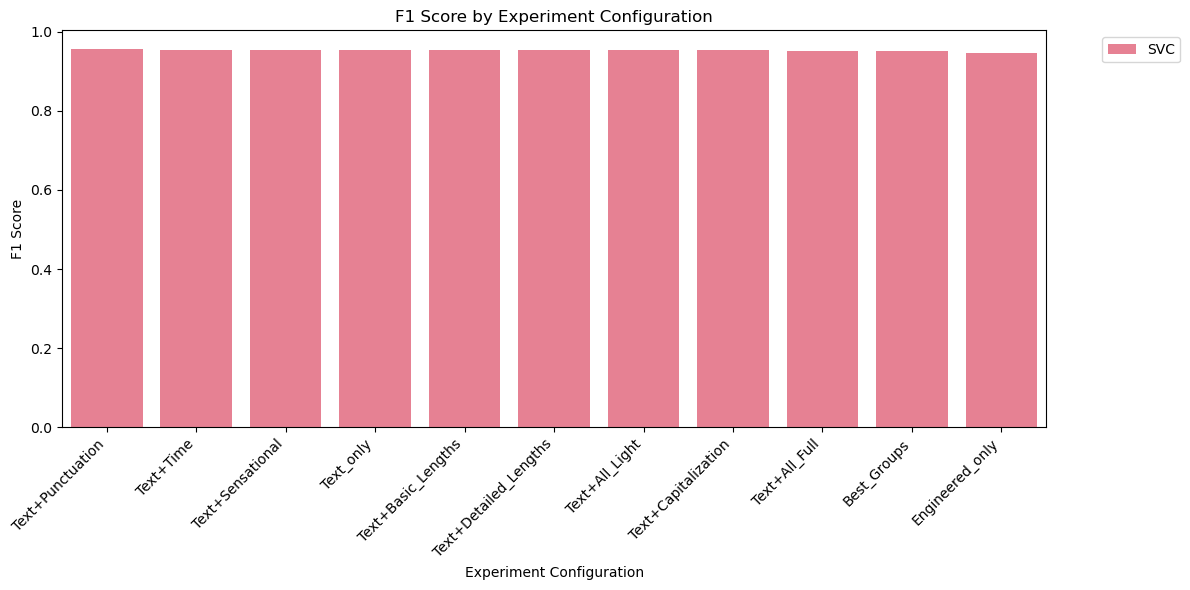

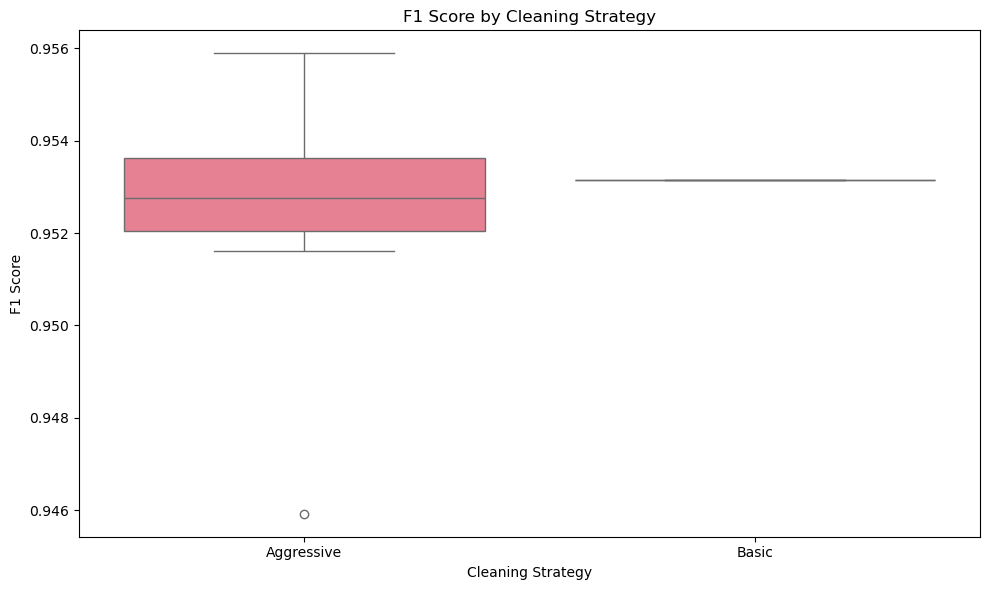

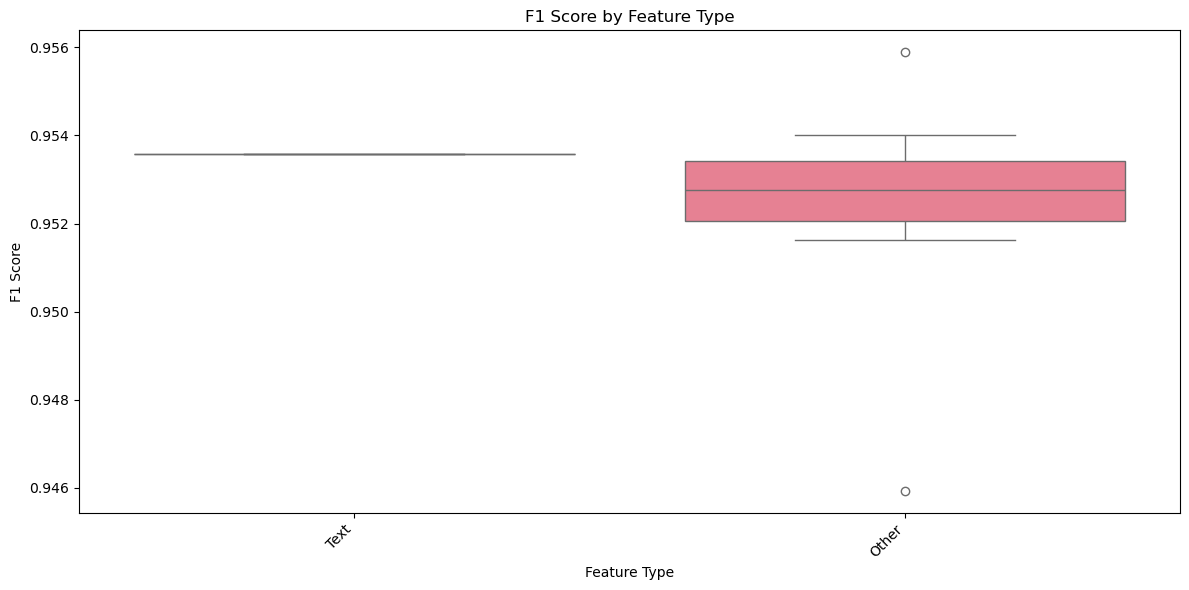

✅ Results analysis completed!


In [11]:
# Create visualizations
print("\n📈 Performance Visualizations:")
print("=" * 50)

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# 1. Bar plot of F1 scores by experiment
plt.figure(figsize=(12, 6))
results_df_sorted = results_df.sort_values('f1', ascending=False)
sns.barplot(data=results_df_sorted, x='experiment', y='f1', hue='model')
plt.title('F1 Score by Experiment Configuration')
plt.xlabel('Experiment Configuration')
plt.ylabel('F1 Score')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2. Comparison of cleaning strategies
plt.figure(figsize=(10, 6))
sns.boxplot(data=results_df, x='cleaning_strategy', y='f1')
plt.title('F1 Score by Cleaning Strategy')
plt.xlabel('Cleaning Strategy')
plt.ylabel('F1 Score')
plt.tight_layout()
plt.show()

# 3. Comparison of feature types
plt.figure(figsize=(12, 6))
sns.boxplot(data=results_df, x='feature_type', y='f1')
plt.title('F1 Score by Feature Type')
plt.xlabel('Feature Type')
plt.ylabel('F1 Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("✅ Results analysis completed!")

### Tables

In [12]:
results_df.head(3)

,experiment,model,accuracy,precision,recall,f1,roc_auc,experiment_id,feature_type,cleaning_strategy
0,Text_only,SVC,0.948786,0.943605,0.963744,0.953568,0.988736,se_s_20250904_235002,Text,Aggressive
1,Text+Basic_Lengths,SVC,0.948365,0.944010,0.962458,0.953145,0.988600,se_s_20250904_235633,Other,Basic
2,Text+Detailed_Lengths,SVC,0.947944,0.941960,0.964001,0.952853,0.988665,se_s_20250905_000334,Other,Aggressive


### **Feature Analysis**


In [13]:

print("\n🔍 FEATURE ANALYSIS:")
feature_performance = results_df.groupby('experiment')[['accuracy', 'f1', 'roc_auc']].mean().sort_values('accuracy', ascending=False)
print("Average performance by feature combination:")
display(feature_performance.round(4))

### **Model Analysis**

print("\n🤖 MODEL ANALYSIS:")
model_performance = results_df.groupby('model')[['accuracy', 'f1', 'roc_auc']].mean().sort_values('accuracy', ascending=False)
print("Average performance by model:")
display(model_performance.round(4))

### **Cleaning Strategy Analysis**

print("\n🧹 CLEANING STRATEGY ANALYSIS:")
results_df['cleaning_strategy'] = results_df['experiment'].apply(lambda x: 'Basic' if 'Basic' in x else 'Aggressive')
cleaning_performance = results_df.groupby('cleaning_strategy')[['accuracy', 'f1', 'roc_auc']].mean()
print("Average performance by cleaning strategy:")
display(cleaning_performance.round(4))


🔍 FEATURE ANALYSIS:
Average performance by feature combination:


,accuracy,f1,roc_auc
experiment,,,
Text+Punctuation,0.9515,0.9559,0.9895
Text+Time,0.9493,0.9540,0.9894
Text+Sensational,0.9489,0.9537,0.9891
Text_only,0.9488,0.9536,0.9887
Text+Basic_Lengths,0.9484,0.9531,0.9886
Text+Detailed_Lengths,0.9479,0.9529,0.9887
Text+All_Light,0.9478,0.9528,0.9887
Text+Capitalization,0.9478,0.9527,0.9890
Text+All_Full,0.9475,0.9525,0.9890



🤖 MODEL ANALYSIS:
Average performance by model:


,accuracy,f1,roc_auc
model,,,
SVC,0.9477,0.9525,0.9888



🧹 CLEANING STRATEGY ANALYSIS:
Average performance by cleaning strategy:


,accuracy,f1,roc_auc
cleaning_strategy,,,
Aggressive,0.9476,0.9525,0.9888
Basic,0.9484,0.9531,0.9886


### **Create Comprehensive Visualizations**



📊 Creating comprehensive experiment results visualization...
💾 Plot saved to: ../models/experiment_results_20250904_234407.png


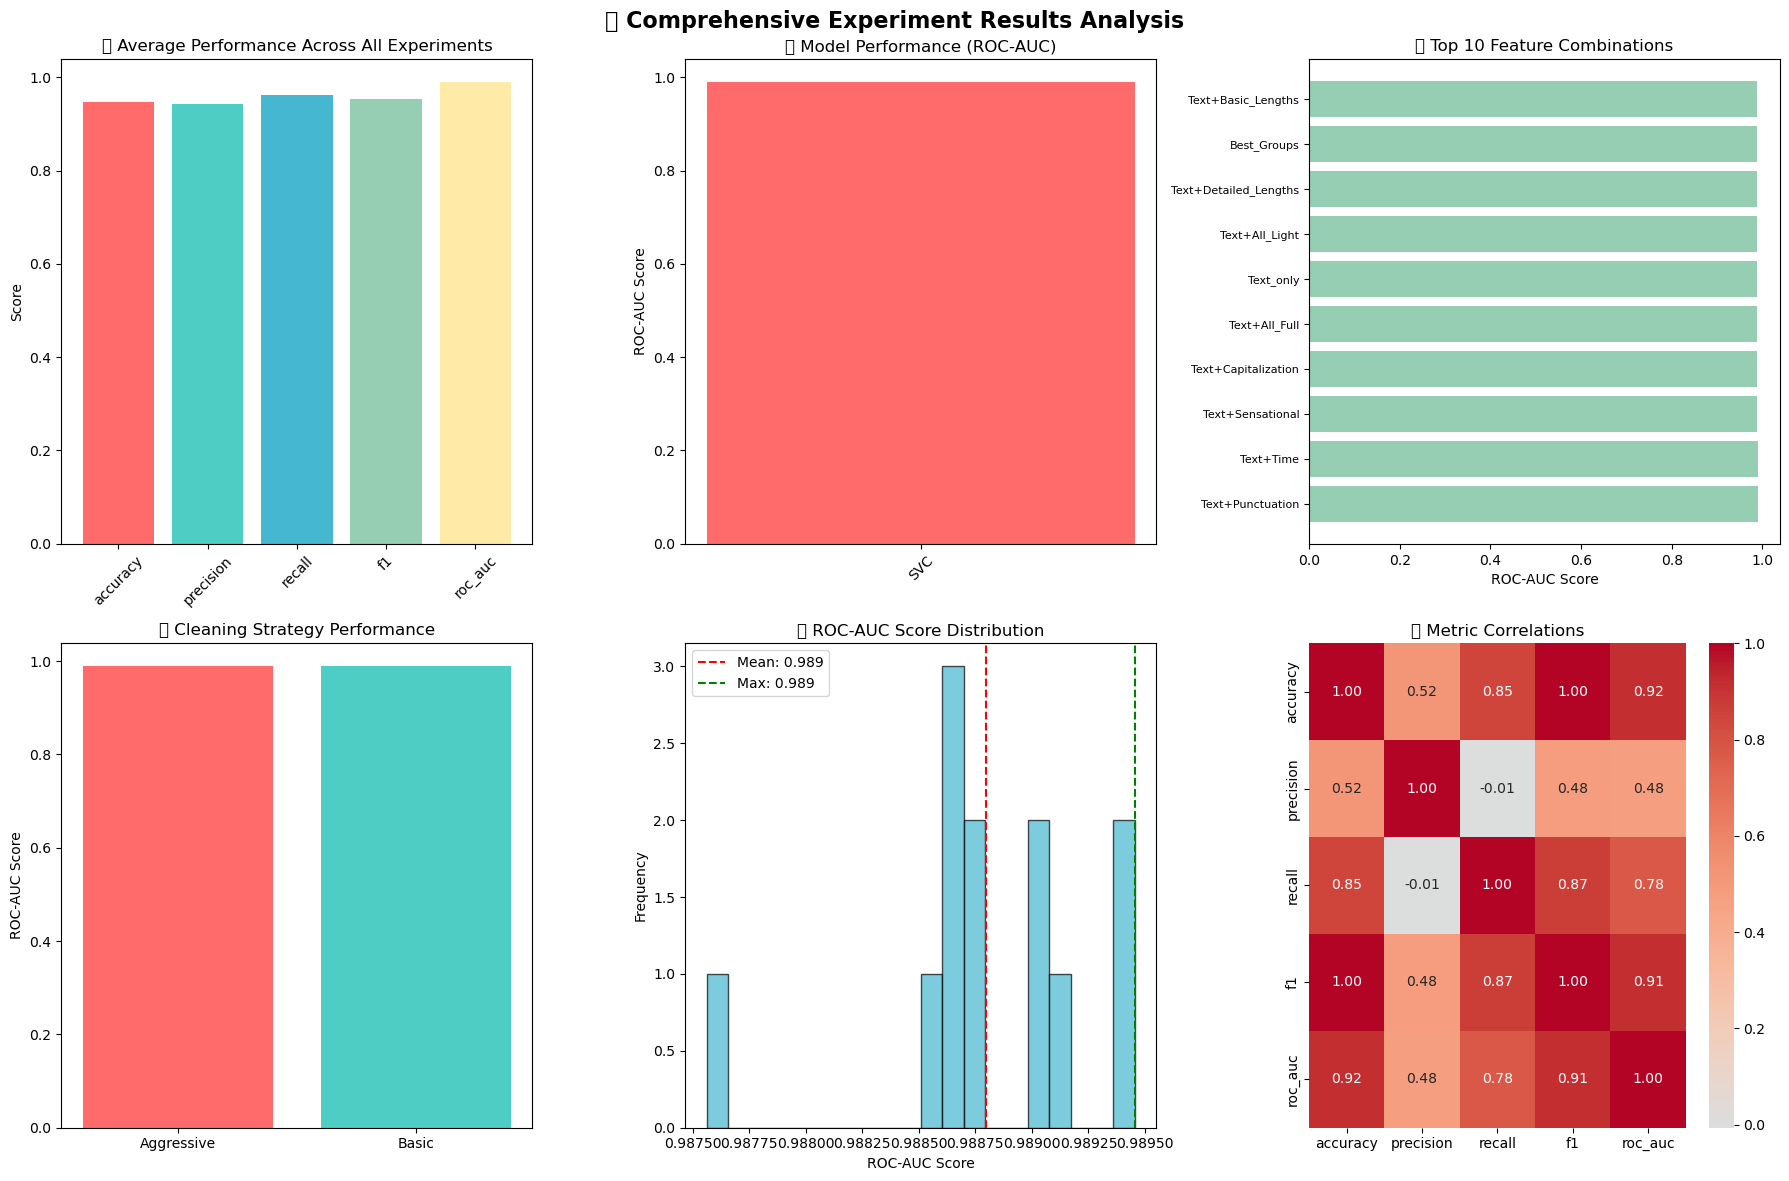


🤖 Creating detailed model comparison visualization...
💾 Model comparison plot saved to: ../models/model_comparison_20250904_234407.png


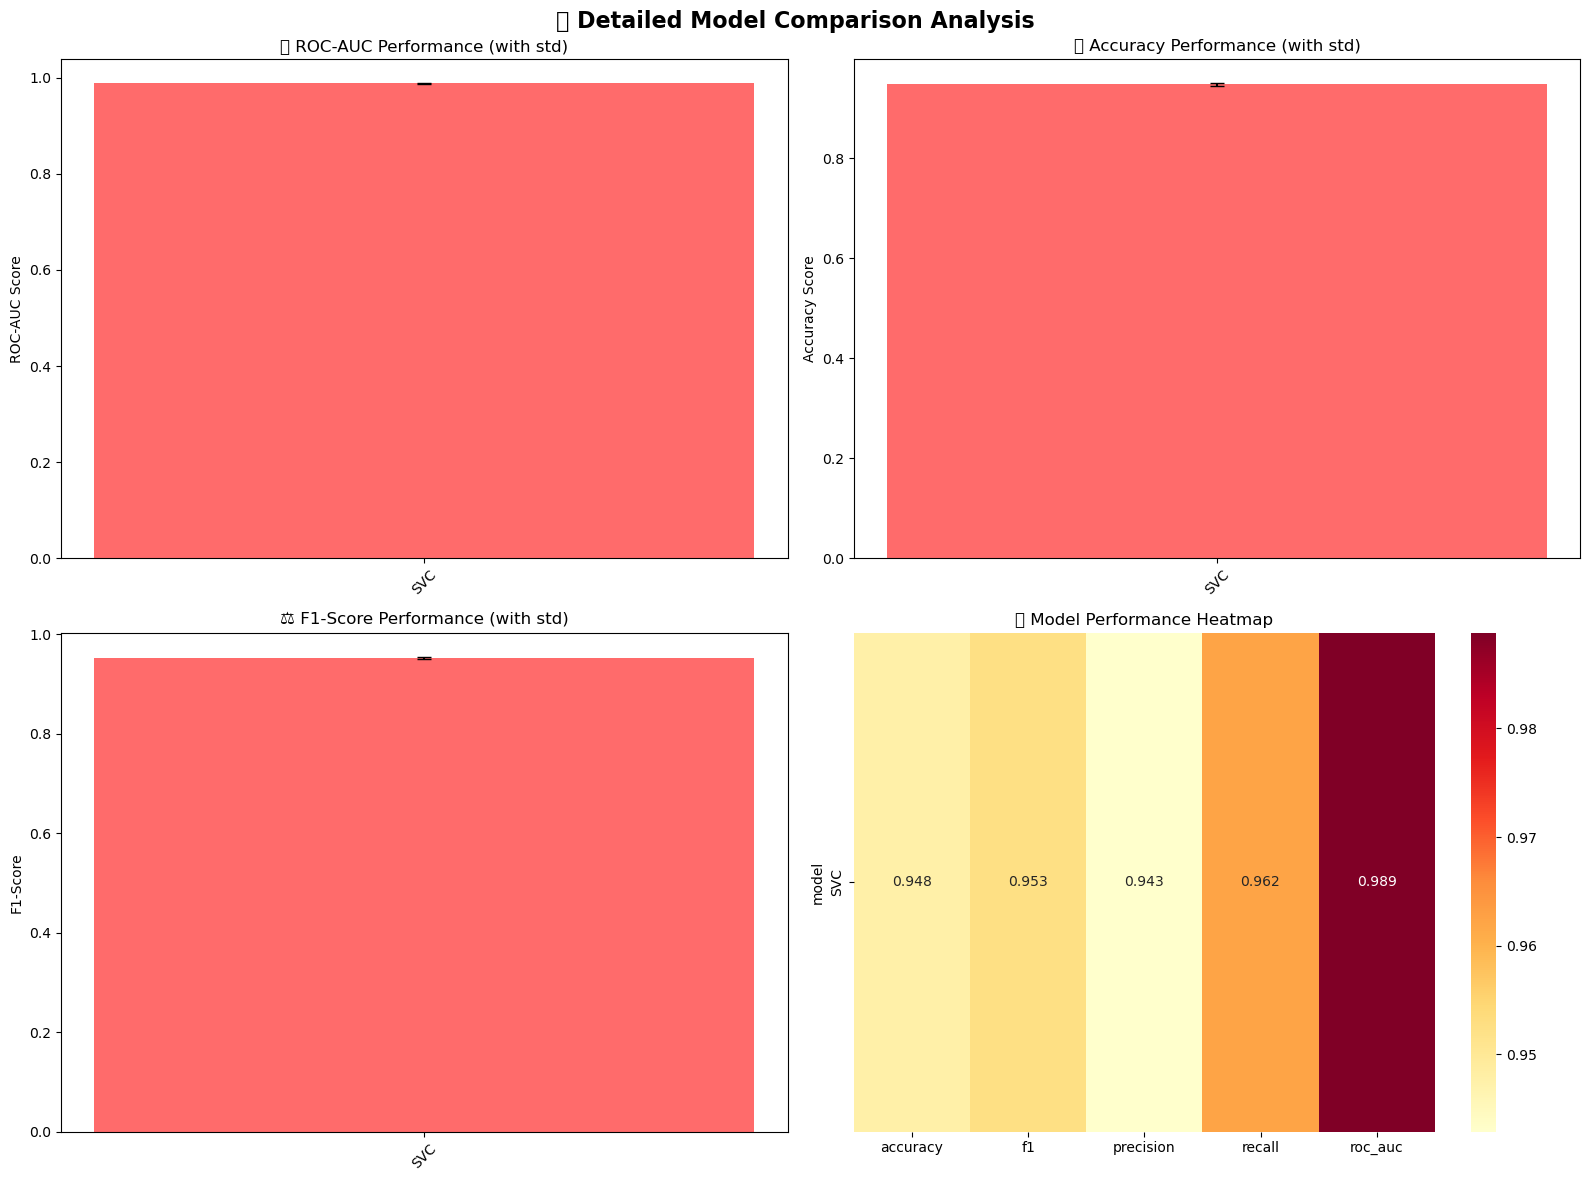


📋 Creating feature combination analysis visualization...
💾 Feature analysis plot saved to: ../models/feature_analysis_20250904_234407.png


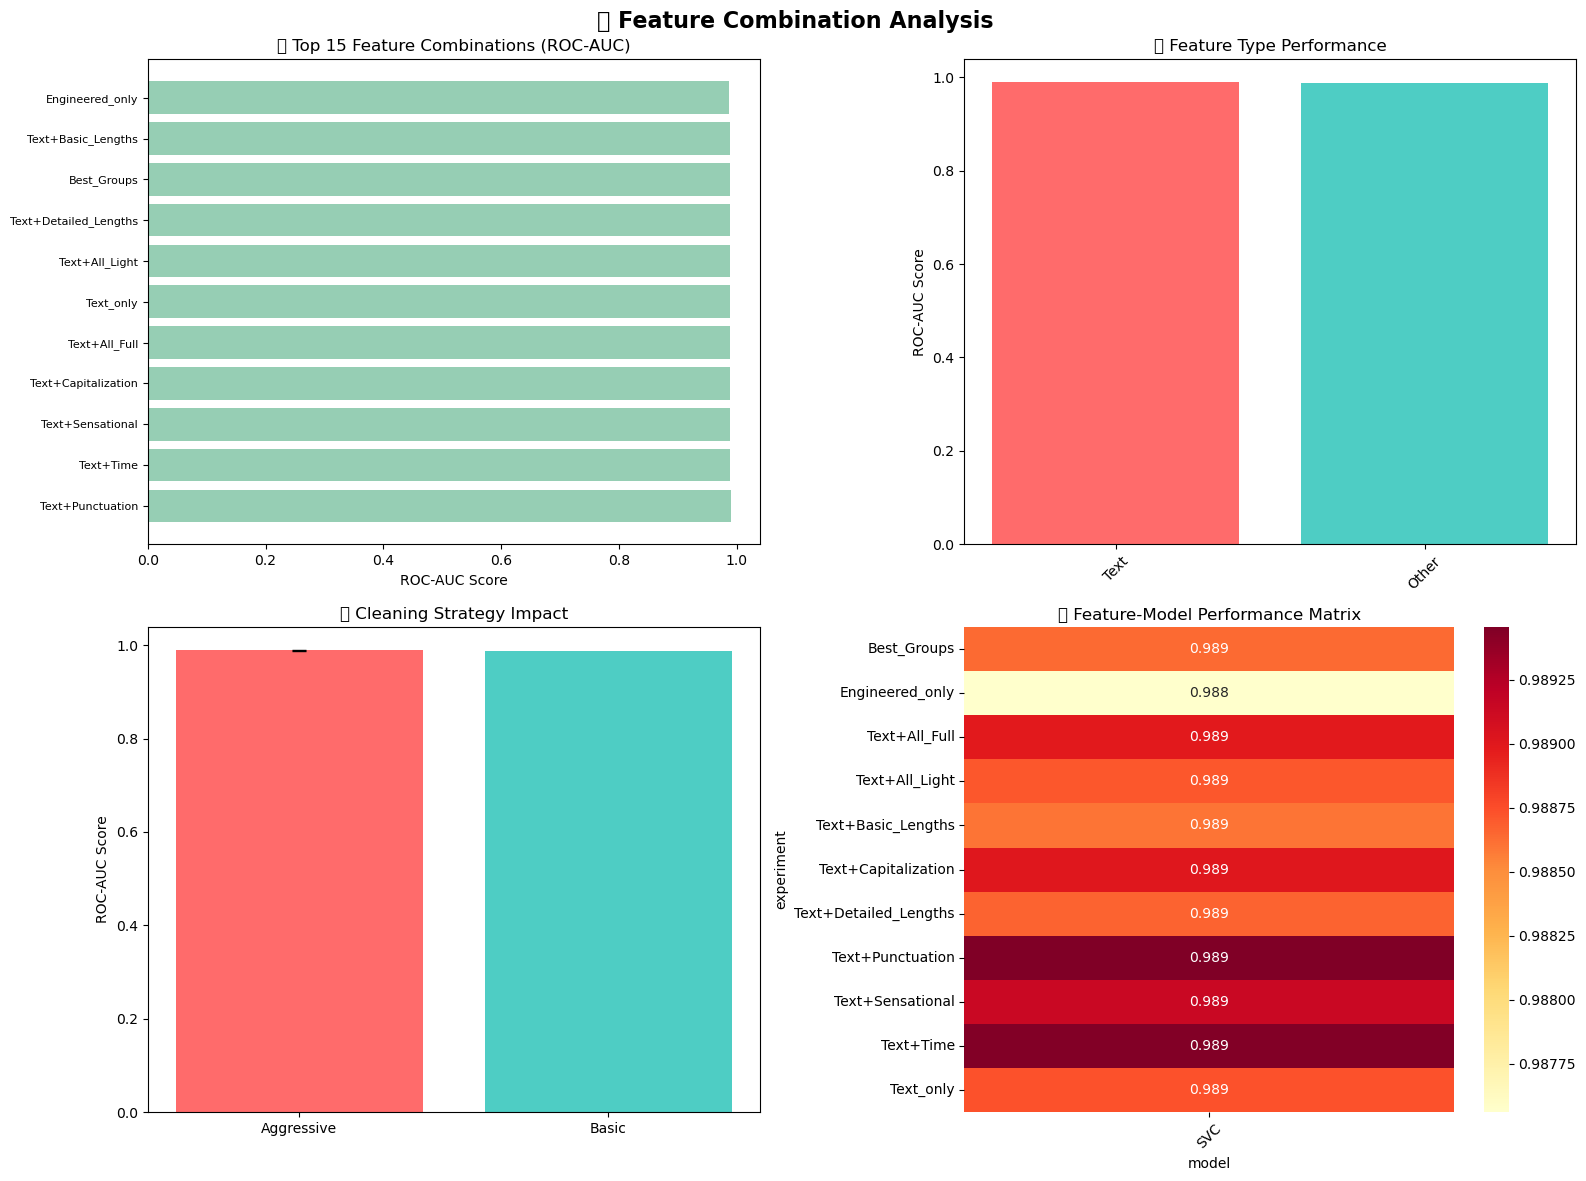


📊 DETAILED RESULTS:


,accuracy,f1,roc_auc
model,SVC,SVC,SVC
experiment,,,
Best_Groups,0.9465,0.9516,0.9886
Engineered_only,0.9408,0.9459,0.9876
Text+All_Full,0.9475,0.9525,0.9890
Text+All_Light,0.9478,0.9528,0.9887
Text+Basic_Lengths,0.9484,0.9531,0.9886
Text+Capitalization,0.9478,0.9527,0.9890
Text+Detailed_Lengths,0.9479,0.9529,0.9887
Text+Punctuation,0.9515,0.9559,0.9895



🔍 FEATURE ANALYSIS:
Average performance by feature combination:


,accuracy,f1,roc_auc
experiment,,,
Text+Punctuation,0.9515,0.9559,0.9895
Text+Time,0.9493,0.9540,0.9894
Text+Sensational,0.9489,0.9537,0.9891
Text_only,0.9488,0.9536,0.9887
Text+Basic_Lengths,0.9484,0.9531,0.9886
Text+Detailed_Lengths,0.9479,0.9529,0.9887
Text+All_Light,0.9478,0.9528,0.9887
Text+Capitalization,0.9478,0.9527,0.9890
Text+All_Full,0.9475,0.9525,0.9890



�� MODEL ANALYSIS:
Average performance by model:


,accuracy,f1,roc_auc
model,,,
SVC,0.9477,0.9525,0.9888



🧹 CLEANING STRATEGY ANALYSIS:
Average performance by cleaning strategy:


,accuracy,f1,roc_auc
cleaning_strategy,,,
Aggressive,0.9476,0.9525,0.9888
Basic,0.9484,0.9531,0.9886


In [14]:
# 1. Overall Experiment Results
print("\n📊 Creating comprehensive experiment results visualization...")
plot_experiment_results(results_df, save_path=f'../models/experiment_results_{timestamp}.png')

# 2. Model Comparison Analysis
print("\n🤖 Creating detailed model comparison visualization...")
plot_model_comparison(results_df, save_path=f'../models/model_comparison_{timestamp}.png')

# 3. Feature Analysis
print("\n📋 Creating feature combination analysis visualization...")
plot_feature_analysis(results_df, save_path=f'../models/feature_analysis_{timestamp}.png')

### **Detailed Results Table**
print(f"\n📊 DETAILED RESULTS:")
results_pivot = results_df.pivot_table(
    values=['accuracy', 'f1', 'roc_auc'], 
    index='experiment', 
    columns='model',
    aggfunc='mean'
).round(4)

display(results_pivot)

### **Feature Analysis**
print("\n🔍 FEATURE ANALYSIS:")
feature_performance = results_df.groupby('experiment')[['accuracy', 'f1', 'roc_auc']].mean().sort_values('accuracy', ascending=False)
print("Average performance by feature combination:")
display(feature_performance.round(4))

### **Model Analysis**
print("\n�� MODEL ANALYSIS:")
model_performance = results_df.groupby('model')[['accuracy', 'f1', 'roc_auc']].mean().sort_values('accuracy', ascending=False)
print("Average performance by model:")
display(model_performance.round(4))

### **Cleaning Strategy Analysis**
print("\n🧹 CLEANING STRATEGY ANALYSIS:")
cleaning_performance = results_df.groupby('cleaning_strategy')[['accuracy', 'f1', 'roc_auc']].mean()
print("Average performance by cleaning strategy:")
display(cleaning_performance.round(4))